In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import importlib
import ast

import os
import sys

path_ = os.path.abspath(os.path.join('..', '00_utils'))
if path_ not in sys.path:
    sys.path.append(path_)
    
import analyse_results
reload_module = analyse_results.reload_module

Graphs = reload_module('analyse_results', 'Graphs')
Results = reload_module('analyse_results', 'Results')

In [2]:
fn = 'interim_results/pyomo_net_size.pkl'
with open(f'{fn}', 'rb') as file:
    pyomo_net_size = pickle.load(file)

pyomo_net_size

,mse_coll_ode,mse_coll_ode_test,times_elapsed,x_labels
1,"[0.0020498345736182752, 0.1625391070278186, 0....","[0.08877011358864202, 0.08129613651685025, 0.0...","[3.6420319080352783, 2.570560932159424, 1.5634...","[6, 16, 1]"
2,"[0.00830953716353252, 0.005034857697813426, 0....","[1.1490917643770724, 0.01874326859418347, 0.09...","[9.330155849456787, 4.441395998001099, 5.56242...","[6, 32, 1]"
3,"[0.007727033352431002, 0.09077779188763284, 0....","[0.08144869761259045, 0.13313111184577636, 0.0...","[11.066005945205688, 11.343966245651245, 11.66...","[6, 64, 1]"
0,"[0.02228703218847206, 0.07567134575961204, 2.3...","[2.2604742317892734, 0.07835105790913474, 1.21...","[68.12530827522278, 44.44263505935669, 51.2373...","[6, 128, 1]"


In [3]:
fn = 'interim_results/diffrax_net_size.pkl'
with open(f'{fn}', 'rb') as file:
    diffrax_net_size = pickle.load(file)

diffrax_net_size

,mse_diffrax,mse_diffrax_test,x_labels,times_elapsed
0,"[0.07620478275677495, 0.09278675140985426, 0.1...","[0.5376941220996303, 0.2476474088598866, 0.395...","[6, 16, 1]","[9.30220890045166, 14.22188401222229, 15.85521..."
1,"[0.014170084471637973, 0.026092865441633615, 0...","[0.26674506393814534, 0.10491367753006223, 0.2...","[6, 32, 1]","[11.137876033782959, 15.190810680389404, 19.08..."
2,"[0.007728837776768791, 0.014807100001473143, 0...","[0.2109382651025699, 0.0824444037401971, 0.271...","[6, 64, 1]","[13.671804904937744, 18.614086866378784, 23.57..."
3,"[0.004136865251746844, 0.01223400609695736, 0....","[0.11767859375523866, 0.06974568928288458, 0.0...","[6, 128, 1]","[21.359206914901733, 26.66003680229187, 34.584..."
4,"[0.2736071454018502, 0.13643812462371527, 0.23...","[0.9461452787804859, 0.3402833991882759, 0.536...","[6, 16, 16, 1]","[12.225907325744629, 17.01177215576172, 25.949..."
5,"[0.09768878334343657, 0.07237938262018219, 0.0...","[0.555175193894065, 0.23193189645114903, 0.123...","[6, 32, 32, 1]","[17.16407299041748, 24.410378217697144, 33.058..."


In [7]:
diffrax_net_size_filterd = Results.filter_by_labels(diffrax_net_size, pyomo_net_size, label_column='x_labels')
diffrax_net_size_filterd
#diffrax_net_size_filterd.times_elapsed.iloc[3][-2] /= 10

/Users/mariiashapo/Library/CloudStorage/OneDrive-Personal/project_2324/NODE/00_utils/analyse_results.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['label_copy'], inplace=True)


,mse_diffrax,mse_diffrax_test,x_labels,times_elapsed
0,"[0.07620478275677495, 0.09278675140985426, 0.1...","[0.5376941220996303, 0.2476474088598866, 0.395...","[6, 16, 1]","[9.30220890045166, 14.22188401222229, 15.85521..."
1,"[0.014170084471637973, 0.026092865441633615, 0...","[0.26674506393814534, 0.10491367753006223, 0.2...","[6, 32, 1]","[11.137876033782959, 15.190810680389404, 19.08..."
2,"[0.007728837776768791, 0.014807100001473143, 0...","[0.2109382651025699, 0.0824444037401971, 0.271...","[6, 64, 1]","[13.671804904937744, 18.614086866378784, 23.57..."
3,"[0.004136865251746844, 0.01223400609695736, 0....","[0.11767859375523866, 0.06974568928288458, 0.0...","[6, 128, 1]","[21.359206914901733, 26.66003680229187, 34.584..."


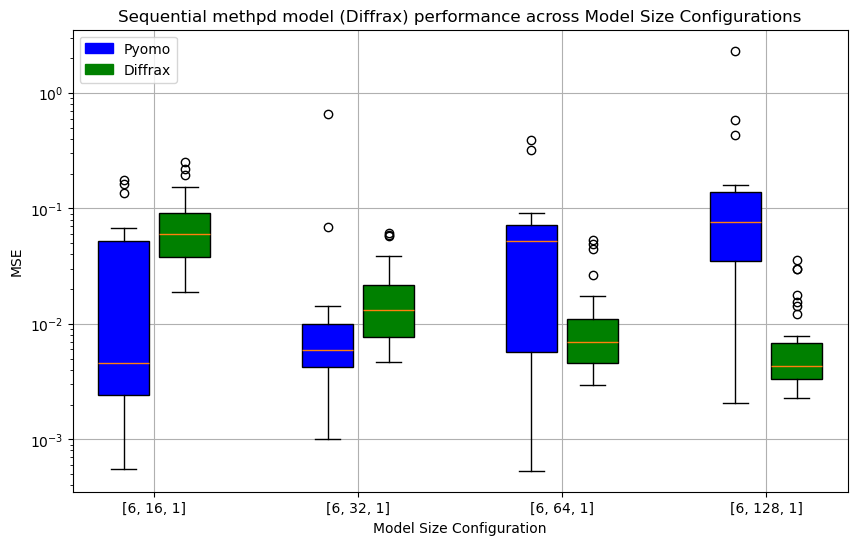

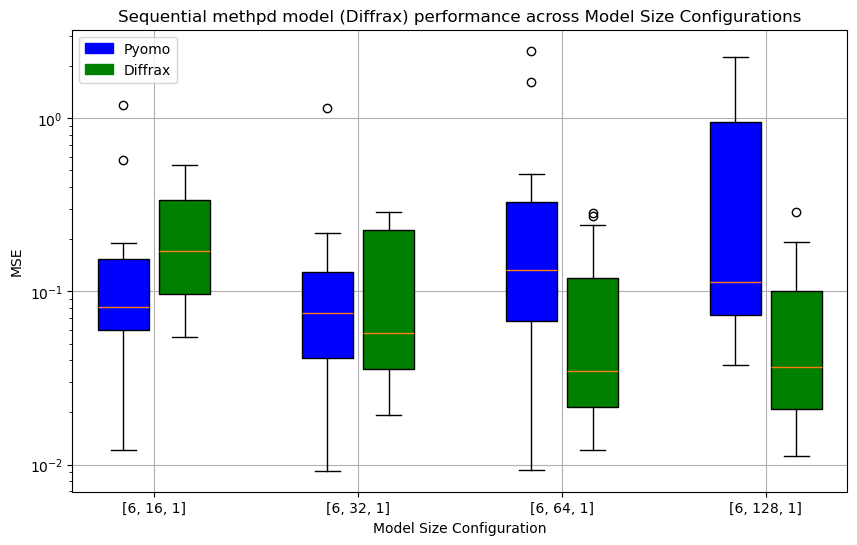

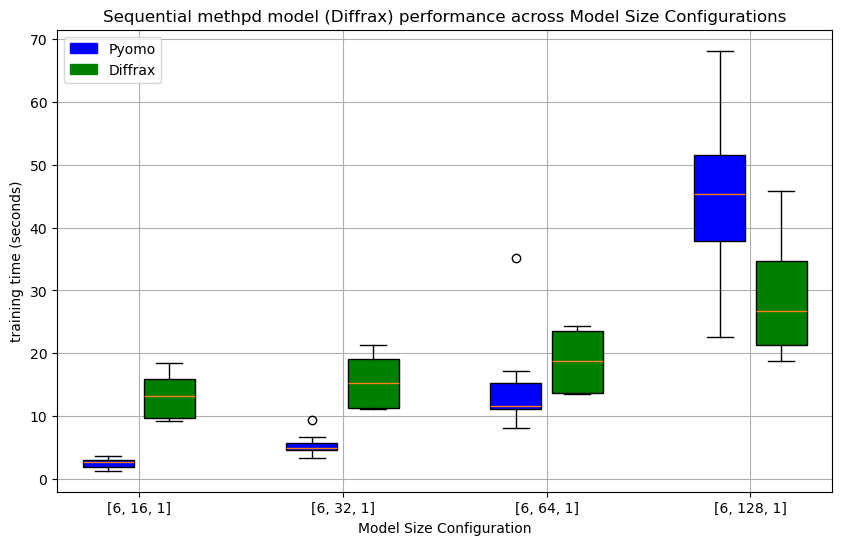

In [8]:
Graphs.plot_boxplots(pyomo_net_size.mse_coll_ode, diffrax_net_size_filterd.mse_diffrax, pyomo_net_size.x_labels, 'Sequential methpd model (Diffrax) performance across Model Size Configurations', 'MSE')
Graphs.plot_boxplots(pyomo_net_size.mse_coll_ode_test, diffrax_net_size_filterd.mse_diffrax_test, pyomo_net_size.x_labels, 'Sequential methpd model (Diffrax) performance across Model Size Configurations', 'MSE')
Graphs.plot_boxplots(pyomo_net_size.times_elapsed, diffrax_net_size_filterd.times_elapsed, pyomo_net_size.x_labels, 'Sequential methpd model (Diffrax) performance across Model Size Configurations', 'training time (seconds)', y_log = False)